In [1]:
!pip install yfinance
!pip install stock-pandas
!pip install ffn
!pip install PyPortfolioOpt
import math
import yfinance as yf
import pandas as pd
import stock_pandas as spd
import matplotlib.pyplot as plt
import ffn
import numpy as np

import copyreg, copy, pickle

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import datetime

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=84bc70b6b74568da8ca4377f0ab20836252572032b7965d0f7fb91a8ba2967ae
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 143kB 5.5MB/s 
  Created wheel for stock-pandas: filename=stock_pandas-0.30.1-cp37-cp37m-linux_x86_64.whl size=279983 sha256=79656e9c9d540905cdf8a7add3252c5f1fee077aab12bbb1375b8c1dcbfd1360
  Stored in directory: /root/.cache/pip/wheels/7c/eb/1c/1974c00b176507a21e82373d0597897628149fec418bf48f7b
Successfully built stock-pandas
     |████████████████████████████████| 61kB 2.4MB/s 
     |████████████████████████████████| 1.3MB 7.6MB/s 
  Installing build dependencies ... done
  Getting requireme

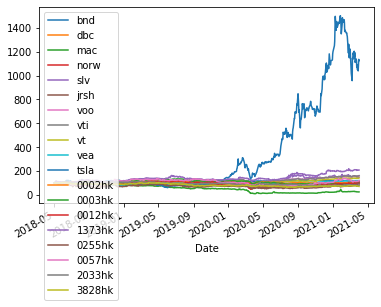

In [2]:
prices = ffn.get('bnd,dbc,mac,norw,slv,jrsh,voo,vti,vt,vea,tsla,0002.hk,0003.hk,0012.hk,1373.hk,0255.hk,0057.hk,2033.hk,3828.hk', start='2017-01-01')

# let's compare the relative performance of each stock
# we will rebase here to get a common starting point for both securities
ax = prices.rebase().plot()

In [3]:
stats = prices.calc_stats()
stats.display()

/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


Stat                 bnd         dbc         mac         norw        slv         jrsh        voo         vti         vt          vea         tsla        0002hk      0003hk      0012hk      1373hk      0255hk      0057hk      2033hk      3828hk
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04  2018-05-04
End                  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01  2021-04-01
Risk-free ra

/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


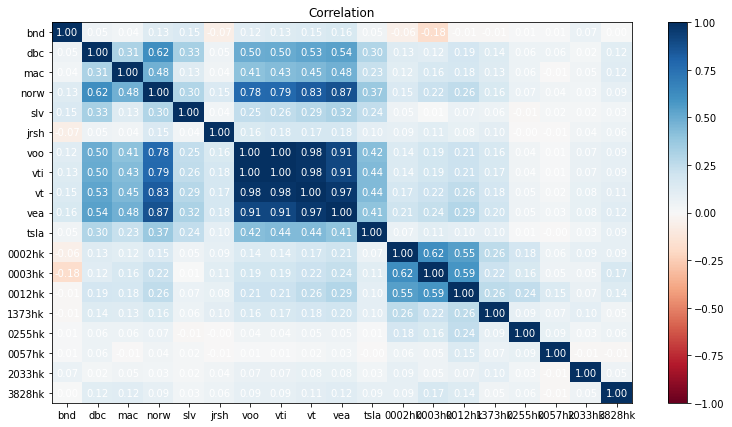

In [4]:
G = ffn.core.GroupStats(prices)
corr = G.plot_correlation(freq='B',title='Correlation',figsize=(13, 7))
corr.show()

In [5]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 34.8%
Annual volatility: 15.3%
Sharpe Ratio: 2.15


(0.347894503014934, 0.15273422967449563, 2.146830502329024)

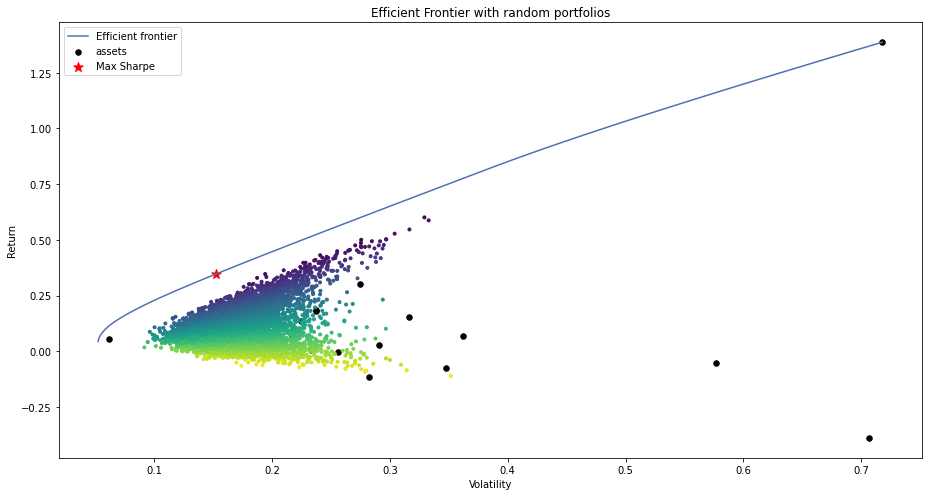

In [6]:

ef = EfficientFrontier(mu, S)

from pypfopt import plotting
fig, ax = plt.subplots(1, figsize=(13, 7))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()

# Generate random portfolios
n_samples = 100
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)
cleaned_weights = ef.clean_weights()
cleaned_weights

Expected annual return: 34.8%
Annual volatility: 15.3%
Sharpe Ratio: 2.15


OrderedDict([('bnd', 0.58474),
             ('dbc', 0.0),
             ('mac', 0.0),
             ('norw', 0.0),
             ('slv', 0.0),
             ('jrsh', 0.0),
             ('voo', 0.0),
             ('vti', 0.0),
             ('vt', 0.0),
             ('vea', 0.0),
             ('tsla', 0.17825),
             ('0002hk', 0.0),
             ('0003hk', 0.0),
             ('0012hk', 0.0),
             ('1373hk', 0.2216),
             ('0255hk', 0.0),
             ('0057hk', 0.01541),
             ('2033hk', 0.0),
             ('3828hk', 0.0)])

In [8]:
ef = EfficientFrontier(mu, S)
weights = ef.min_volatility()
ef.portfolio_performance(verbose=True)
cleaned_weights = ef.clean_weights()
cleaned_weights

Expected annual return: 4.4%
Annual volatility: 5.2%
Sharpe Ratio: 0.46


OrderedDict([('bnd', 0.76983),
             ('dbc', 0.04609),
             ('mac', 0.0),
             ('norw', 0.0),
             ('slv', 0.0),
             ('jrsh', 0.0082),
             ('voo', 0.0),
             ('vti', 0.0),
             ('vt', 0.0),
             ('vea', 0.0),
             ('tsla', 0.0),
             ('0002hk', 0.01462),
             ('0003hk', 0.09097),
             ('0012hk', 0.0),
             ('1373hk', 0.01156),
             ('0255hk', 0.02123),
             ('0057hk', 0.01348),
             ('2033hk', 0.0075),
             ('3828hk', 0.01653)])